# Programming Assignment 1
```
| Behat Halilaj   | 3670538 |
| Julian Bur      | 3726991 |
| Philip Hoffmann | 3552659 |
```
## 1.1 Happiness is a Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data from file
data = pd.read_csv("happiness-report-2016.csv", header=0)


### A+B) Linear regression
    

In [2]:
# target feature
happinessScore = data.iloc[:, 3].values

# other features
economy = data.iloc[:, 6].values
family = data.iloc[:, 7].values
health = data.iloc[:, 8].values
freedom = data.iloc[:, 9].values
trust = data.iloc[:, 10].values
region = data.iloc[:, 1].values

# TODO: Did we use the right algorithm?
def linReg(x, y, x_label, y_label):
    reg = linear_model.LinearRegression()
    x_t = x.reshape(-1, 1)

    reg.fit(x_t, y)

    y_pred = reg.predict(x_t)

    # Calculate oefficients
    w0 = reg.intercept_
    w1 = reg.coef_[0]

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)

    # Plot
    plt.scatter(x, y, color='blue', marker='x')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_t, y_pred, color='red', linewidth=2)
    plt.show()

    print("Linear Regression:")
    print("CorrCoeff:", np.corrcoef(x, y)[0][1])
    print("w0:", w0)
    print("w1:", w1)
    print("MSE:", mse)

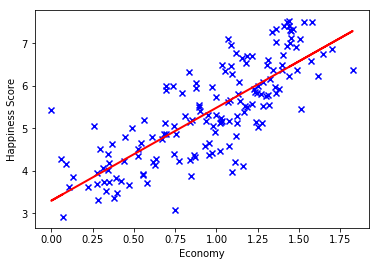

Linear Regression:
CorrCoeff: 0.7903220167261058
w0: 3.296180041308006
w1: 2.1868632217257336
MSE: 0.4861751800515042


In [3]:
linReg(economy, happinessScore, "Economy", "Happiness Score")

In [4]:
linReg(family, happinessScore, "Family", "Happiness Score")

Linear Regression:
CorrCoeff: 0.7392515774070009
w0: 2.8707897965612656
w1: 3.1644760594639627
MSE: 0.587344486251004


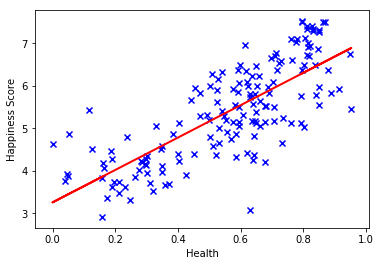

Linear Regression:
CorrCoeff: 0.7653843344336674
w0: 3.2576597858122236
w1: 3.80999392123655
MSE: 0.5364201409759957


In [5]:
linReg(health, happinessScore, "Health", "Happiness Score")

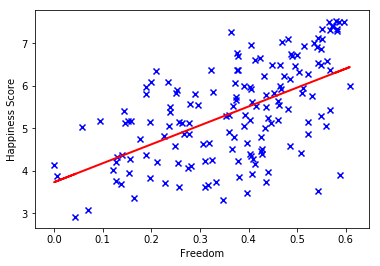

Linear Regression:
CorrCoeff: 0.566826673096893
w0: 3.7322157882953566
w1: 4.447428893666056
MSE: 0.8790052384076528


In [6]:
linReg(freedom, happinessScore, "Freedom", "Happiness Score")

In [7]:
linReg(trust, happinessScore, "Trust", "Happiness Score")

Linear Regression:
CorrCoeff: 0.4020322451472925
w0: 4.813299103118789
w1: 4.13362938697677
MSE: 1.0857868257510237


## C) Multiple Linear Regression

In [11]:
X = data.iloc[:, [6, 7, 8, 9, 10]]  # economy, family, health, freedom, trust, region
X_full = pd.concat([X, pd.get_dummies(region)], axis=1)  # add region one-hot encoded

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_full, happinessScore, test_size=0.2)

# Fit linear model (multi linear model is automatically used here)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Calculate coefficients
print("w0:", reg.intercept_)
print("w_i:", reg.coef_)

# Calculate MSE
mse = sum((reg.predict(X_test) - y_test)**2) / len(y_test)
print("MSE:", mse)


w0: 2.8786428899343206
w_i: [ 0.81716507  0.94018283  0.63694499  1.327002    1.41148286  0.46260076
 -0.14001408 -0.35656207  0.4044902  -0.08459682  0.62507068 -0.33933768
 -0.24103088 -0.47557995  0.14495984]
MSE: 0.11560173654220102
